# Импорт и анализ таблиц

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import pearsonr, spearmanr, mannwhitneyu
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_excel('Новый диплом датасет.xlsx', 'Данные')
df2 = pd.read_excel('Новый диплом датасет.xlsx', 'Clients')
df3 = pd.read_excel('Новый диплом датасет.xlsx', 'Region_dict')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37989 entries, 0 to 37988
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_order     37989 non-null  int64  
 1   id_client    37401 non-null  float64
 2   amt_payment  35845 non-null  float64
 3   dtime_pay    35828 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ MB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55605 entries, 0 to 55604
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_client         55605 non-null  int64         
 1   dtime_ad          55356 non-null  datetime64[ns]
 2   nflag_test        55605 non-null  int64         
 3   id_trading_point  55605 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.7 MB


In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_trading_point  66 non-null     int64 
 1   city              66 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [6]:
# Удалим строки, где не введен ID клиента, так как будет непонятно, кто этот клиент и входит\не входит он в определенную группу
df1 = df1.dropna (subset=['id_client'])
# И заменим остальные значения на 0
df1 = df1.fillna(0)
# # Удалим пустые строки, так как при пустой дате добавления клиента не соблюдается длительность эксперимента (3 месяца)
df2 = df2.dropna()
df3 = df3.dropna()

In [7]:
city_point_group = df3.groupby('city')['id_trading_point'].count().reset_index()
city_point_group

,city,id_trading_point
0,Великий Новгород,1
1,Владимир,1
2,Волгоград,1
3,Дмитров,1
4,Казань,6
5,Краснодар,4
6,Красноярск,5
7,Москва,11
8,Мурманск,2
9,Нижний Новгород,1


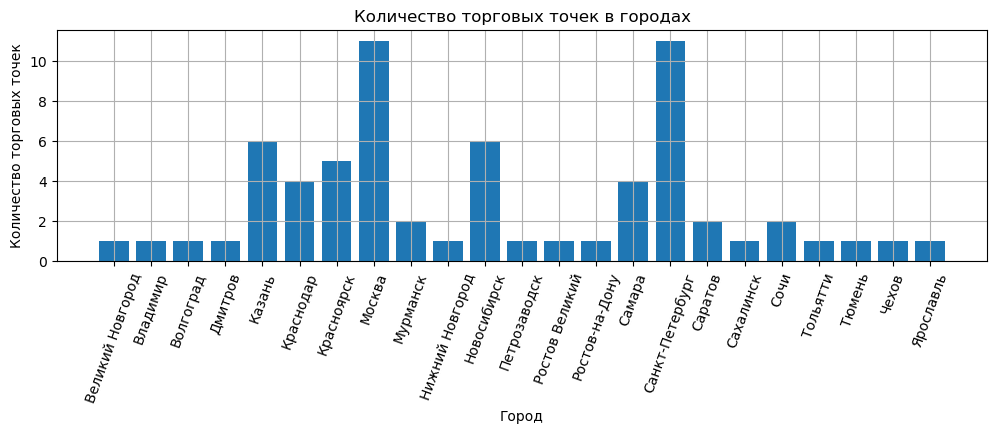

In [8]:
plt.figure(figsize=(12, 3))
plt.bar(city_point_group['city'],city_point_group['id_trading_point'])
plt.xlabel('Город')
plt.ylabel('Количество торговых точек')
plt.title('Количество торговых точек в городах')
plt.xticks(rotation=70)
plt.grid()
plt.show()

# Объединение таблиц

In [9]:
cnt_client_pay = df1.groupby('id_client')['amt_payment'].sum().reset_index()
cnt_client_pay

,id_client,amt_payment
0,178561.0,3052.0
1,178562.0,2439.0
2,178563.0,768.0
3,178564.0,0.0
4,178565.0,958.0
...,...,...
29707,209630.0,6927.0
29708,209631.0,2090.0
29709,209632.0,2775.0
29710,209633.0,1673.0


In [10]:
df_client = pd.merge(cnt_client_pay, df2, on='id_client', how = 'right')

In [11]:
df_client['nflag_test'] = df_client['nflag_test'].fillna(1000000)
df_client = df_client.fillna(0)
df_client

,id_client,amt_payment,dtime_ad,nflag_test,id_trading_point
0,180844.0,5349.0,2022-06-08 18:38:41.414,0,212
1,226069.0,0.0,2022-07-11 16:28:38.511,1,54
2,183981.0,6322.0,2022-06-16 12:23:59.289,1,991
3,322530.0,0.0,2022-07-08 08:56:08.714,0,1015
4,254313.0,0.0,2022-06-19 22:18:01.770,1,453
...,...,...,...,...,...
55351,193038.0,5846.0,2022-07-09 00:31:25.196,0,1015
55352,244069.0,0.0,2022-08-08 00:12:31.319,1,991
55353,189084.0,7146.0,2022-06-29 04:34:42.610,1,439
55354,182758.0,13720.0,2022-06-13 11:28:37.856,1,573


In [12]:
client_city = pd.merge(df_client,df3, how = 'left')
client_city

,id_client,amt_payment,dtime_ad,nflag_test,id_trading_point,city
0,180844.0,5349.0,2022-06-08 18:38:41.414,0,212,Красноярск
1,226069.0,0.0,2022-07-11 16:28:38.511,1,54,Мурманск
2,183981.0,6322.0,2022-06-16 12:23:59.289,1,991,Казань
3,322530.0,0.0,2022-07-08 08:56:08.714,0,1015,Краснодар
4,254313.0,0.0,2022-06-19 22:18:01.770,1,453,Санкт-Петербург
...,...,...,...,...,...,...
55351,193038.0,5846.0,2022-07-09 00:31:25.196,0,1015,Краснодар
55352,244069.0,0.0,2022-08-08 00:12:31.319,1,991,Казань
55353,189084.0,7146.0,2022-06-29 04:34:42.610,1,439,Казань
55354,182758.0,13720.0,2022-06-13 11:28:37.856,1,573,Санкт-Петербург


In [13]:
flag = []
for i in client_city['amt_payment']:
    if i > 0:
        flag.append(1)
    else:
        flag.append(0)
client_city['flag'] = flag
client_city

,id_client,amt_payment,dtime_ad,nflag_test,id_trading_point,city,flag
0,180844.0,5349.0,2022-06-08 18:38:41.414,0,212,Красноярск,1
1,226069.0,0.0,2022-07-11 16:28:38.511,1,54,Мурманск,0
2,183981.0,6322.0,2022-06-16 12:23:59.289,1,991,Казань,1
3,322530.0,0.0,2022-07-08 08:56:08.714,0,1015,Краснодар,0
4,254313.0,0.0,2022-06-19 22:18:01.770,1,453,Санкт-Петербург,0
...,...,...,...,...,...,...,...
55351,193038.0,5846.0,2022-07-09 00:31:25.196,0,1015,Краснодар,1
55352,244069.0,0.0,2022-08-08 00:12:31.319,1,991,Казань,0
55353,189084.0,7146.0,2022-06-29 04:34:42.610,1,439,Казань,1
55354,182758.0,13720.0,2022-06-13 11:28:37.856,1,573,Санкт-Петербург,1


# Автоматизация статистических вычислений

In [14]:
def test_calc(r1, r2, alpha = 0.05):
    
    s,p = ttest_ind(r1,r2)
    
    if p < alpha:
        print("Гипотеза H0 не подтверждается: средние не равны")
    else:
        print("Гипотеза H0 подтверждается: средние равны")
    
    print("Среднее значение 1 ряда", r1.mean())
    print("Среднее значение 2 ряда", r2.mean())
    print("Разница средних = ", r1.mean()-r2.mean())
    print("P_value = ",p)
    return s, p

In [15]:
def mann_whitney_func(r1, r2, alpha=.05):
    
    s, p = mannwhitneyu(r1, r2)
    
    if p < alpha:
        print('Распределения не равны')
    else:
        print('Распределения равны')
    
    print("P_value = ",p)
    return s, p

# Чистка неверно заполненных точек

In [16]:
zero = client_city.groupby('id_trading_point')['amt_payment'].sum().reset_index()
not_pay = []
for i in zero['id_trading_point'].unique():
    if ((zero['id_trading_point']==i) & (zero['amt_payment']==0)).any():
        not_pay.append(i)
not_pay = pd.DataFrame({'id_trading_point': not_pay})
print(not_pay)

   id_trading_point
0                 1
1                 4
2                 7
3                13
4                23
5                26


In [17]:
not_group = []
for i in client_city['id_trading_point'].unique():
    sum_a = client_city[(client_city['id_trading_point']==i) & (client_city['nflag_test']==0)].sum()['amt_payment'].sum()
    sum_b = client_city[(client_city['id_trading_point']==i) & (client_city['nflag_test']==1)].sum()['amt_payment'].sum()
    if (sum_a == 0) | (sum_b == 0):
        not_group.append(i)
not_group = pd.DataFrame({'id_trading_point': not_group})
print(not_group)

    id_trading_point
0               1015
1                866
2               1099
3                739
4                 46
5                228
6                 26
7                603
8                810
9                800
10                 7
11                23
12                 4
13                 1
14                13


# Расчет общих результатов АБ Теста

In [18]:
client_city_clear = client_city[~client_city['id_trading_point'].isin(not_pay['id_trading_point']) & 
                                ~client_city['id_trading_point'].isin(not_group['id_trading_point'])]
client_city_clear

,id_client,amt_payment,dtime_ad,nflag_test,id_trading_point,city,flag
0,180844.0,5349.0,2022-06-08 18:38:41.414,0,212,Красноярск,1
1,226069.0,0.0,2022-07-11 16:28:38.511,1,54,Мурманск,0
2,183981.0,6322.0,2022-06-16 12:23:59.289,1,991,Казань,1
4,254313.0,0.0,2022-06-19 22:18:01.770,1,453,Санкт-Петербург,0
5,195818.0,4021.0,2022-07-16 01:30:59.088,1,2652,Москва,1
...,...,...,...,...,...,...,...
55350,188702.0,1323.0,2022-06-28 06:16:25.664,0,453,Санкт-Петербург,1
55352,244069.0,0.0,2022-08-08 00:12:31.319,1,991,Казань,0
55353,189084.0,7146.0,2022-06-29 04:34:42.610,1,439,Казань,1
55354,182758.0,13720.0,2022-06-13 11:28:37.856,1,573,Санкт-Петербург,1


### Гистограмма платежей

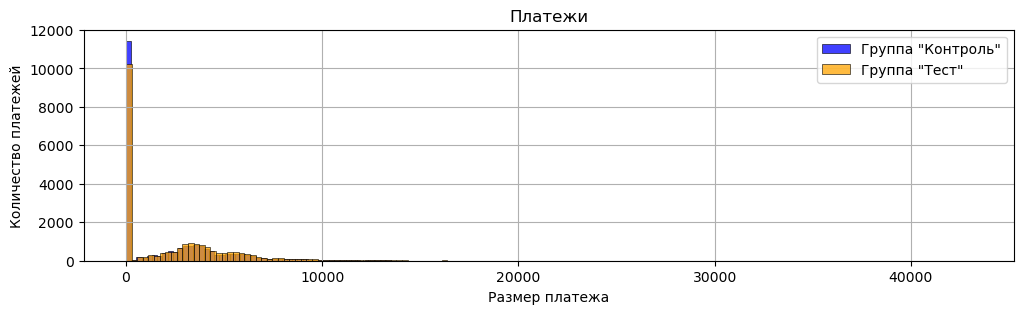

In [19]:
plt.figure(figsize=(12, 3))
sns.histplot(client_city_clear[client_city_clear['nflag_test']==0]['amt_payment'], color='blue', label = 'Группа "Контроль"')
sns.histplot(client_city_clear[client_city_clear['nflag_test']==1]['amt_payment'], color='orange', label = 'Группа "Тест"')
plt.xlabel('Размер платежа')
plt.ylabel('Количество платежей')
plt.title('Платежи')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

### Увеличим масштаб графика

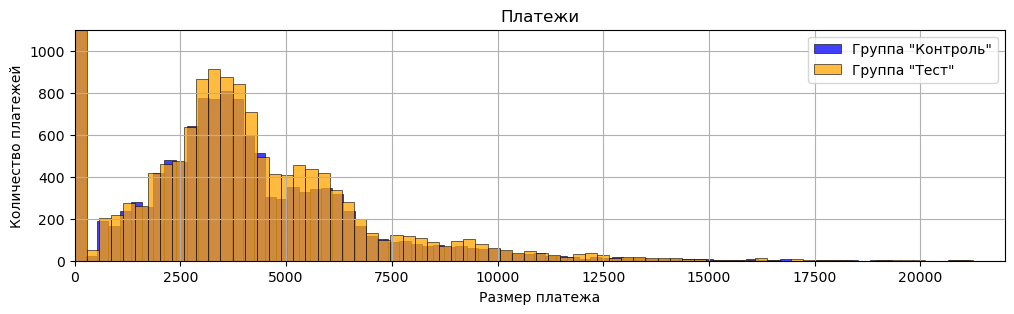

In [20]:
plt.figure(figsize=(12, 3))
sns.histplot(client_city_clear[client_city_clear['nflag_test']==0]['amt_payment'], color='blue', label = 'Группа "Контроль"')
sns.histplot(client_city_clear[client_city_clear['nflag_test']==1]['amt_payment'], color='orange', label = 'Группа "Тест"')
plt.xlabel('Размер платежа')
plt.ylabel('Количество платежей')
plt.title('Платежи')
plt.ylim([0, 1100])
plt.xlim([0, 22000])
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

In [21]:
s_t, p_t = test_calc(client_city_clear[client_city_clear['nflag_test']==0]['amt_payment'],
                     client_city_clear[client_city_clear['nflag_test']==1]['amt_payment'])

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2189.1884317754557
Среднее значение 2 ряда 2455.5845845399867
Разница средних =  -266.39615276453105
P_value =  1.0857547123769503e-21


In [22]:
df_gr = client_city_clear.groupby('nflag_test').agg({'flag':'sum','id_client':'count'}).reset_index()
df_gr

,nflag_test,flag,id_client
0,0,11431,22873
1,1,12207,22445


In [23]:
df_gr['conv'] = df_gr['flag'] / df_gr['id_client']
df_gr

,nflag_test,flag,id_client,conv
0,0,11431,22873,0.499760
1,1,12207,22445,0.543863


In [24]:
s_t, p_t = test_calc(df_gr[df_gr['nflag_test']==0]['flag'],
                     df_gr[df_gr['nflag_test']==1]['flag'])

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 11431.0
Среднее значение 2 ряда 12207.0
Разница средних =  -776.0
P_value =  nan


In [25]:
s_mw, p_mw = mann_whitney_func(client_city_clear[client_city_clear['nflag_test']==0]['flag'],
                               client_city_clear[client_city_clear['nflag_test']==1]['flag'])

Распределения не равны
P_value =  5.6162497735928165e-21


# Сегментация результатов АБ Теста

In [26]:
df_msk = client_city_clear[client_city_clear['city']=='Москва']
df_spb = client_city_clear[client_city_clear['city']=='Санкт-Петербург']

### Москва

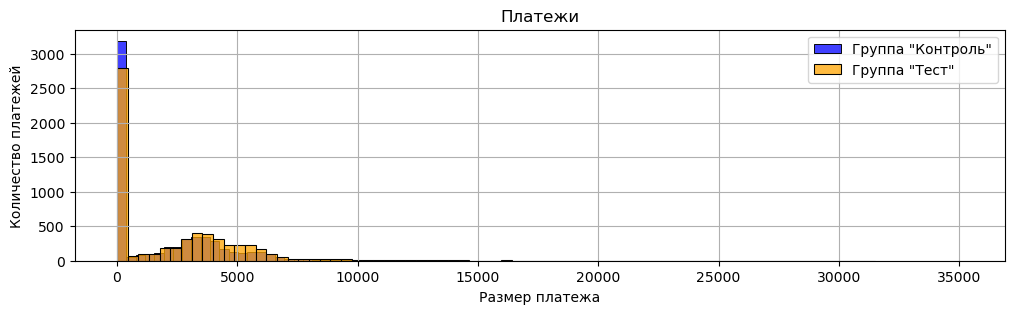

In [27]:
plt.figure(figsize=(12, 3))
sns.histplot(df_msk[df_msk['nflag_test']==0]['amt_payment'], color='blue', label = 'Группа "Контроль"')
sns.histplot(df_msk[df_msk['nflag_test']==1]['amt_payment'], color='orange', label = 'Группа "Тест"')
plt.xlabel('Размер платежа')
plt.ylabel('Количество платежей')
plt.title('Платежи')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

### Увеличим масштаб графика

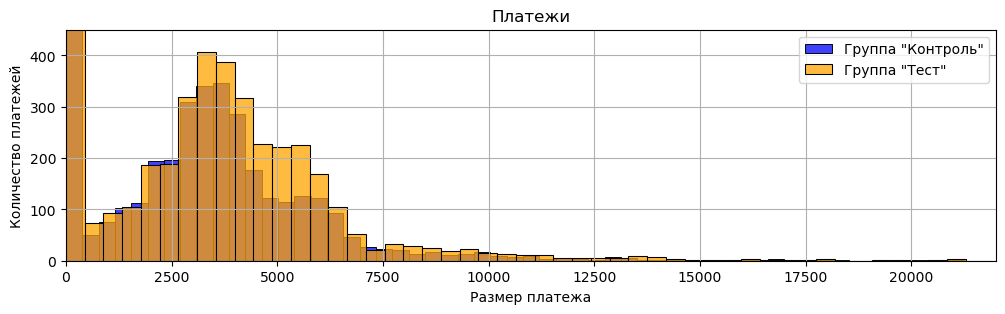

In [28]:
plt.figure(figsize=(12, 3))
sns.histplot(df_msk[df_msk['nflag_test']==0]['amt_payment'], color='blue', label = 'Группа "Контроль"')
sns.histplot(df_msk[df_msk['nflag_test']==1]['amt_payment'], color='orange', label = 'Группа "Тест"')
plt.xlabel('Размер платежа')
plt.ylabel('Количество платежей')
plt.title('Платежи')
plt.ylim([0, 450])
plt.xlim([0, 22000])
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

In [29]:
s_t_msk, p_t_msk = test_calc(df_msk[df_msk['nflag_test']==0]['amt_payment'],
                             df_msk[df_msk['nflag_test']==1]['amt_payment'])

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 1986.18059125964
Среднее значение 2 ряда 2379.233778937072
Разница средних =  -393.0531876774321
P_value =  3.116649629630609e-15


In [30]:
df_gr_msk = df_msk.groupby('nflag_test').agg({'flag':'sum','id_client':'count'}).reset_index()
df_gr_msk

,nflag_test,flag,id_client
0,0,3037,6224
1,1,3347,6134


In [31]:
df_gr_msk['conv'] = df_gr_msk['flag'] / df_gr_msk['id_client']
df_gr_msk

,nflag_test,flag,id_client,conv
0,0,3037,6224,0.487950
1,1,3347,6134,0.545647


In [32]:
s_t_msk, p_t_msk = test_calc(df_gr_msk[df_gr_msk['nflag_test']==0]['flag'],
                             df_gr_msk[df_gr_msk['nflag_test']==1]['flag'])

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 3037.0
Среднее значение 2 ряда 3347.0
Разница средних =  -310.0
P_value =  nan


In [33]:
s_mw, p_mw = mann_whitney_func(df_msk[df_msk['nflag_test']==0]['flag'],
                               df_msk[df_msk['nflag_test']==1]['flag'])

Распределения не равны
P_value =  1.3888194541373183e-10


### Санкт-Петербург

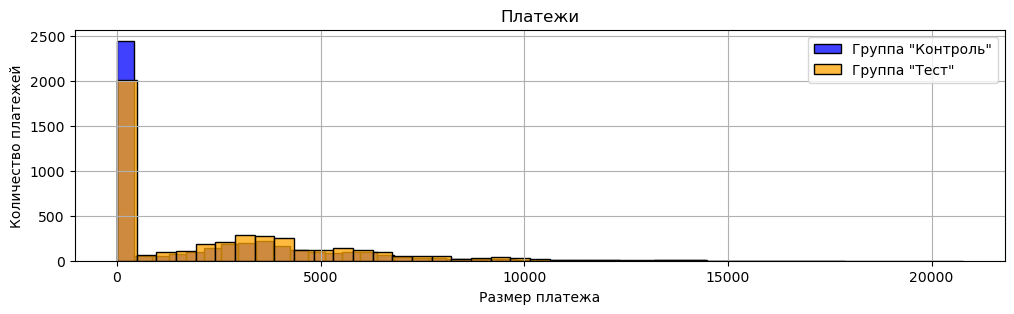

In [34]:
plt.figure(figsize=(12, 3))
sns.histplot(df_spb[df_spb['nflag_test']==0]['amt_payment'], color='blue', label = 'Группа "Контроль"')
sns.histplot(df_spb[df_spb['nflag_test']==1]['amt_payment'], color='orange', label = 'Группа "Тест"')
plt.xlabel('Размер платежа')
plt.ylabel('Количество платежей')
plt.title('Платежи')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

### Увеличим масштаб графика

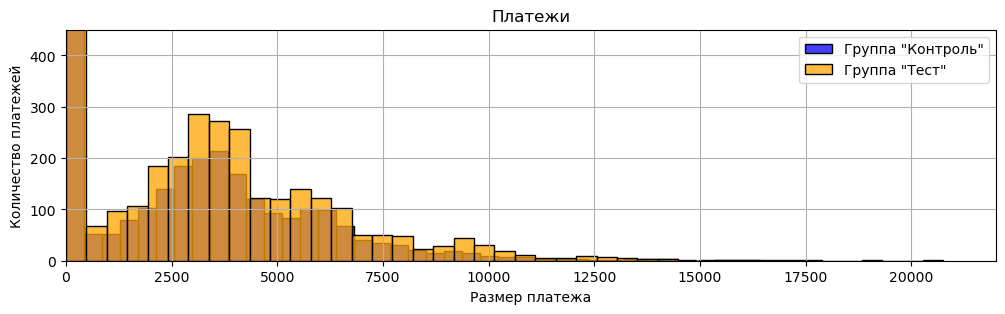

In [35]:
plt.figure(figsize=(12, 3))
sns.histplot(df_spb[df_spb['nflag_test']==0]['amt_payment'], color='blue', label = 'Группа "Контроль"')
sns.histplot(df_spb[df_spb['nflag_test']==1]['amt_payment'], color='orange', label = 'Группа "Тест"')
plt.xlabel('Размер платежа')
plt.ylabel('Количество платежей')
plt.title('Платежи')
plt.ylim([0, 450])
plt.xlim([0, 22000])
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

In [36]:
s_t_spb, p_t_spb = test_calc(df_spb[df_spb['nflag_test']==0]['amt_payment'],
                             df_spb[df_spb['nflag_test']==1]['amt_payment'])

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 1913.5586377988272
Среднее значение 2 ряда 2427.462542182227
Разница средних =  -513.9039043833998
P_value =  2.3198088937974163e-18


In [37]:
df_gr_spb = df_spb.groupby('nflag_test').agg({'flag':'sum','id_client':'count'}).reset_index()
df_gr_spb

,nflag_test,flag,id_client
0,0,1988,4434
1,1,2432,4445


In [38]:
df_gr_spb['conv'] = df_gr_spb['flag'] / df_gr_spb['id_client']
df_gr_spb

,nflag_test,flag,id_client,conv
0,0,1988,4434,0.448354
1,1,2432,4445,0.547132


In [39]:
s_t_spb, p_t_spb = test_calc(df_gr_spb[df_gr_spb['nflag_test']==0]['flag'],
                             df_gr_spb[df_gr_spb['nflag_test']==1]['flag'])

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1988.0
Среднее значение 2 ряда 2432.0
Разница средних =  -444.0
P_value =  nan


In [40]:
s_mw, p_mw = mann_whitney_func(df_spb[df_spb['nflag_test']==0]['flag'],
                               df_spb[df_spb['nflag_test']==1]['flag'])

Распределения не равны
P_value =  1.3118606823466691e-20


### Другие города

In [41]:
def grafik(a):
    plt.figure(figsize=(12, 3))
    sns.histplot(a[a['nflag_test']==0]['amt_payment'], color='blue', label = 'Группа "Контроль"')
    sns.histplot(a[a['nflag_test']==1]['amt_payment'], color='orange', label = 'Группа "Тест"')
    plt.xlabel('Размер платежа')
    plt.ylabel('Количество платежей')
    plt.title(f'Платежи {i}')
    plt.legend(loc = 'upper right')
    plt.grid()
    plt.show()

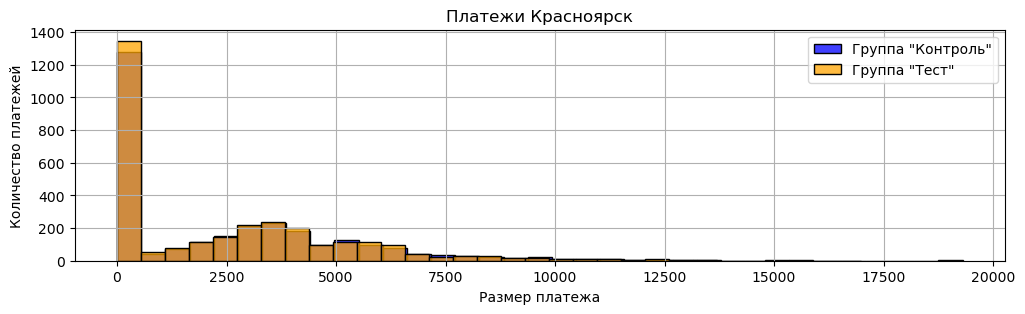


Используем Т-тест
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2428.7775862068966
Среднее значение 2 ряда 2437.4958840961476
Разница средних =  -8.718297889251062
P_value =  0.9044823881233125

Сравним конверсии
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1628.0
Среднее значение 2 ряда 1694.0
Разница средних =  -66.0
P_value =  nan

Используем критерий Манна — Уитни
Распределения равны
P_value =  0.7805140863923713


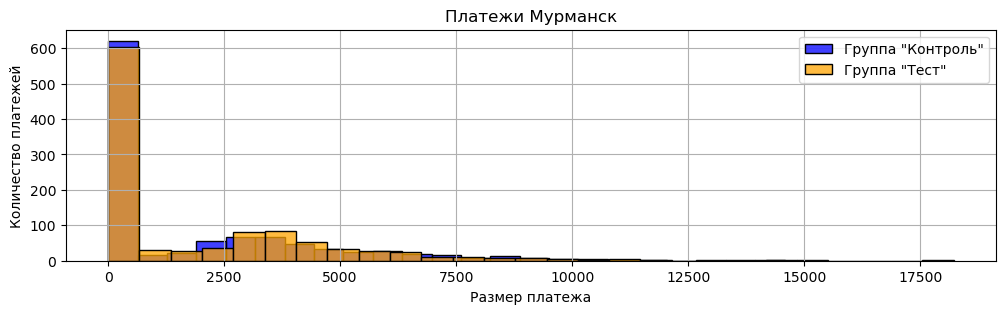


Используем Т-тест
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1857.2197183098592
Среднее значение 2 ряда 1865.2710900473933
Разница средних =  -8.051371737534055
P_value =  0.9449762446327565

Сравним конверсии
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 446.0
Среднее значение 2 ряда 461.0
Разница средних =  -15.0
P_value =  nan

Используем критерий Манна — Уитни
Распределения равны
P_value =  0.3975381533962302


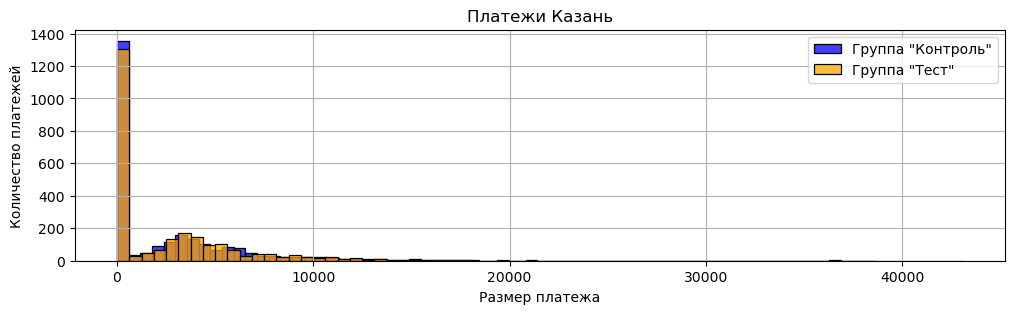


Используем Т-тест
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2610.688397361273
Среднее значение 2 ряда 2733.942
Разница средних =  -123.25360263872699
P_value =  0.27881554740494296

Сравним конверсии
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1224.0
Среднее значение 2 ряда 1197.0
Разница средних =  27.0
P_value =  nan

Используем критерий Манна — Уитни
Распределения равны
P_value =  0.7848080524600568


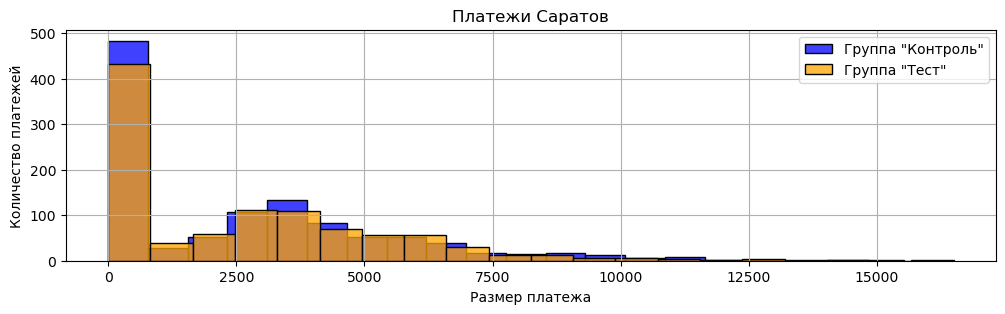


Используем Т-тест
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2541.6456266907126
Среднее значение 2 ряда 2528.7887462981244
Разница средних =  12.85688039258821
P_value =  0.9162512798549167

Сравним конверсии
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 637.0
Среднее значение 2 ряда 596.0
Разница средних =  41.0
P_value =  nan

Используем критерий Манна — Уитни
Распределения равны
P_value =  0.5151549688905628


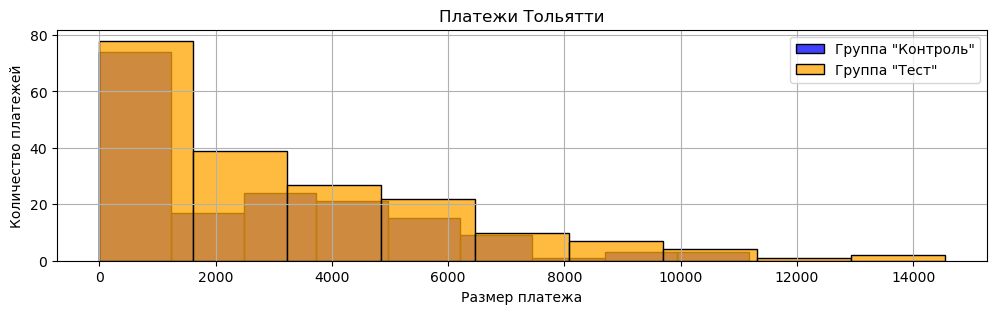


Используем Т-тест
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2439.4610778443116
Среднее значение 2 ряда 2902.4105263157894
Разница средних =  -462.9494484714778
P_value =  0.1333273246710206

Сравним конверсии
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 97.0
Среднее значение 2 ряда 122.0
Разница средних =  -25.0
P_value =  nan

Используем критерий Манна — Уитни
Распределения равны
P_value =  0.2364676058329549


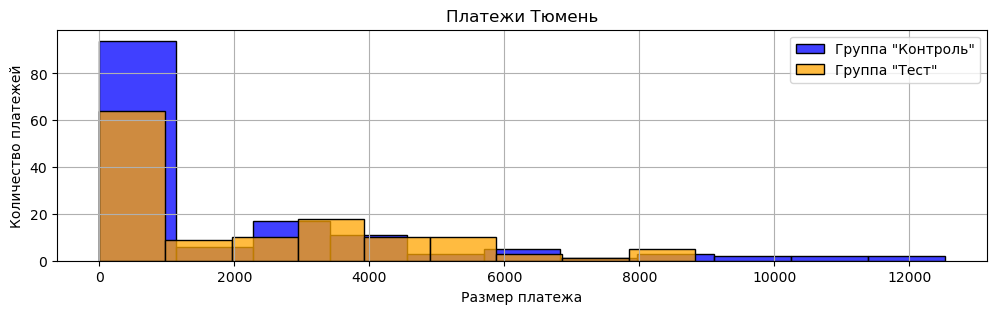


Используем Т-тест
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1743.376712328767
Среднее значение 2 ряда 2043.823076923077
Разница средних =  -300.4463645943099
P_value =  0.3550227648604757

Сравним конверсии
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 55.0
Среднее значение 2 ряда 68.0
Разница средних =  -13.0
P_value =  nan

Используем критерий Манна — Уитни
Распределения не равны
P_value =  0.014823398915456424


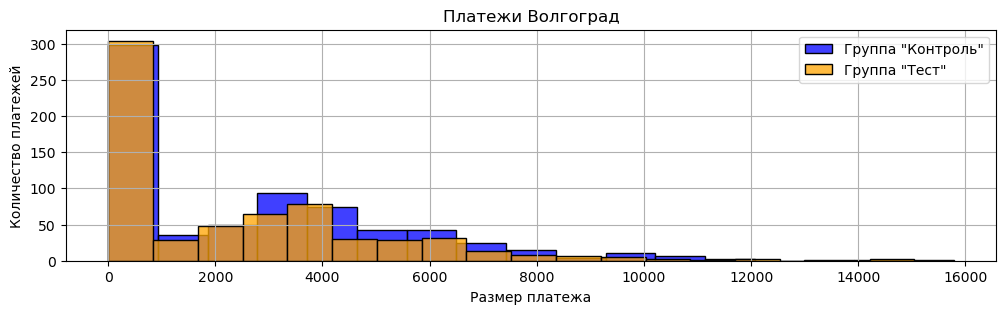


Используем Т-тест
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2601.7610241820767
Среднее значение 2 ряда 2288.8706240487063
Разница средних =  312.89040013337035
P_value =  0.03686899928098654

Сравним конверсии
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 419.0
Среднее значение 2 ряда 363.0
Разница средних =  56.0
P_value =  nan

Используем критерий Манна — Уитни
Распределения равны
P_value =  0.10498253648223195


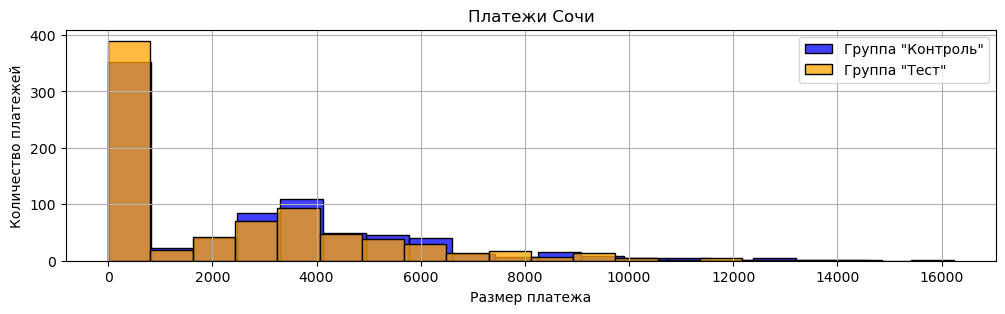


Используем Т-тест
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2523.081885856079
Среднее значение 2 ряда 2305.8304020100504
Разница средних =  217.2514838460288
P_value =  0.12297605685687812

Сравним конверсии
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 463.0
Среднее значение 2 ряда 418.0
Разница средних =  45.0
P_value =  nan

Используем критерий Манна — Уитни
Распределения не равны
P_value =  0.047359239516048784


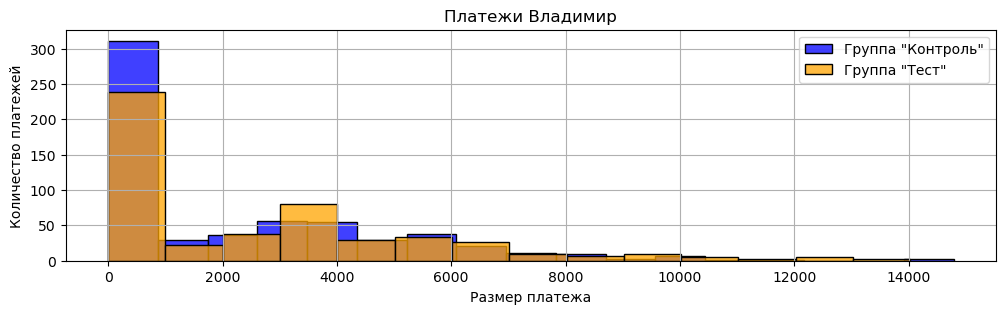


Используем Т-тест
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2108.6101973684213
Среднее значение 2 ряда 2547.2200392927307
Разница средних =  -438.6098419243094
P_value =  0.010095112170351712

Сравним конверсии
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 303.0
Среднее значение 2 ряда 280.0
Разница средних =  23.0
P_value =  nan

Используем критерий Манна — Уитни
Распределения равны
P_value =  0.08483342425116364


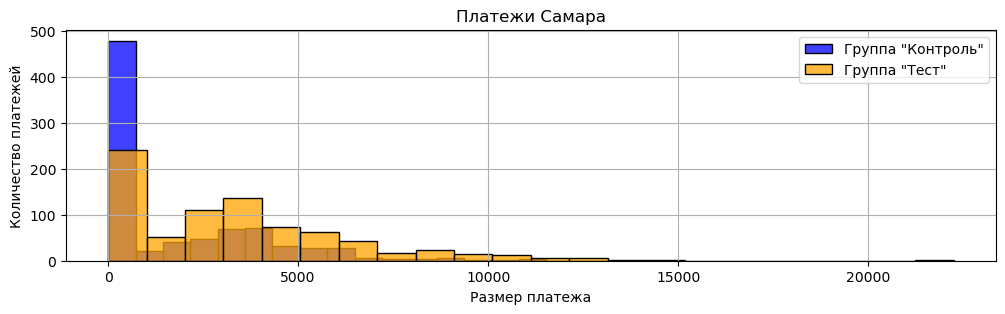


Используем Т-тест
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 1718.4172576832152
Среднее значение 2 ряда 3262.78927680798
Разница средних =  -1544.3720191247648
P_value =  1.1014020778472052e-29

Сравним конверсии
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 372.0
Среднее значение 2 ряда 575.0
Разница средних =  -203.0
P_value =  nan

Используем критерий Манна — Уитни
Распределения не равны
P_value =  5.58808973496e-30


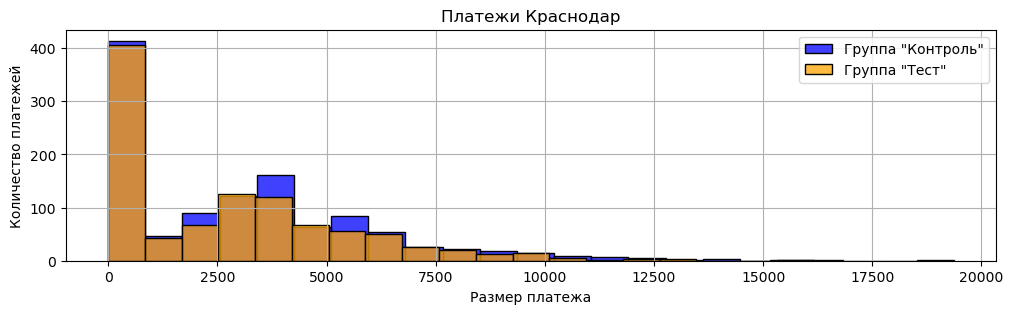


Используем Т-тест
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2912.4310798946444
Среднее значение 2 ряда 2696.8046875
Разница средних =  215.62639239464443
P_value =  0.085800112916198

Сравним конверсии
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 744.0
Среднее значение 2 ряда 629.0
Разница средних =  115.0
P_value =  nan

Используем критерий Манна — Уитни
Распределения равны
P_value =  0.060406618664924146


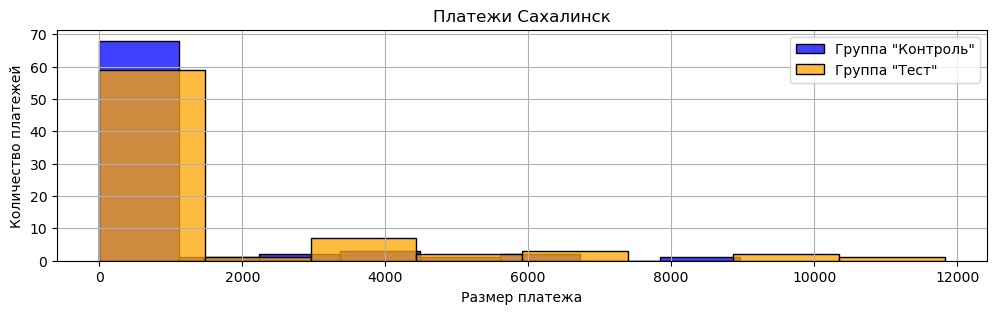


Используем Т-тест
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 600.1538461538462
Среднее значение 2 ряда 1171.4533333333334
Разница средних =  -571.2994871794872
P_value =  0.10580921254927302

Сравним конверсии
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 11.0
Среднее значение 2 ряда 16.0
Разница средних =  -5.0
P_value =  nan

Используем критерий Манна — Уитни
Распределения равны
P_value =  0.24351609530716278


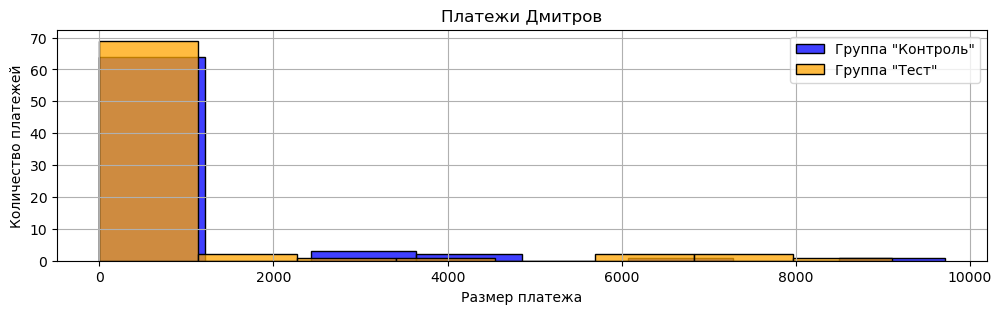


Используем Т-тест
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 483.4507042253521
Среднее значение 2 ряда 579.3333333333334
Разница средних =  -95.88262910798124
P_value =  0.7410763125801646

Сравним конверсии
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 7.0
Среднее значение 2 ряда 9.0
Разница средних =  -2.0
P_value =  nan

Используем критерий Манна — Уитни
Распределения равны
P_value =  0.7444023199576546


In [42]:
for i in client_city_clear['city'].unique():
    if i == 'Москва' or i == 'Санкт-Петербург':
        continue
    df_other = client_city_clear[client_city_clear['city']==i]
    grafik(df_other)
    print()
    print('Используем Т-тест')    
    s_t_oth, p_t_oth = test_calc(df_other[df_other['nflag_test']==0]['amt_payment'],
                                 df_other[df_other['nflag_test']==1]['amt_payment'])
    df_gr_othr = df_other.groupby('nflag_test').agg({'flag':'sum','id_client':'count'}).reset_index()
    df_gr_othr['conv'] = df_gr_othr['flag'] / df_gr_othr['id_client']
    print()
    print('Сравним конверсии')
    s_t_othr, p_t_othr = test_calc(df_gr_othr[df_gr_othr['nflag_test']==0]['flag'],
                                   df_gr_othr[df_gr_othr['nflag_test']==1]['flag'])
    print()
    print('Используем критерий Манна — Уитни')    
    s_mw_oth, p_mw_oth = mann_whitney_func(df_other[df_other['nflag_test']==0]['flag'],
                                           df_other[df_other['nflag_test']==1]['flag'])

# Отчет по АБ Тесту

In [43]:
tt = {
    'city': [], #город
    'id_trading_point': [], #уникальный идентификатор торговой точки, к которой прикреплен данный пользователь
    'count_test': [], #кол-во наблюдений в тестовой группе
    'count_control': [], #кол-во наблюдений в контрольной группе
    'count_all': [], #суммарное кол-во наблюдений
    'percent_count': [],#процент кол-ва наблюдений данной ТТ от всех наблюдений
    'avg_payment_test': [], #средний платеж в тестовой группе
    'avg_payment_control': [], #средний платеж в контрольной группе
    'diff': [], #разница между средними платежами
    'sigma_test': [], #стандартное отклонение платежей в тестовой группе
    'sigma_control': [], #стандартное отклонение платежей в контрольной группе
    'ttest': [], #значение статистического критерия (критерий Стьюдента для сравнения средних платежей)
    'pvalue_ttest': [], #pvalue статистического критерия (критерий Стьюдента для сравнения средних платежей)
    'flag_exodus': [] #флаг (лейбл), по которому можно будет разделить торговые точки по результатам эксперимента
}

In [44]:
for i in client_city_clear['city'].unique():
    for j in client_city_clear['id_trading_point'].unique():
        df_filtered_city = client_city_clear[(client_city_clear['city'] == i) & 
                                        (client_city_clear['id_trading_point'] == j)] 
        df_filtered_city_test = client_city_clear[(client_city_clear['city'] == i) & 
                                        (client_city_clear['id_trading_point'] == j) & 
                                        (client_city_clear['nflag_test'] == 1)]
        df_filtered_city_control = client_city_clear[(client_city_clear['city'] == i) & 
                                        (client_city_clear['id_trading_point'] == j) & 
                                        (client_city_clear['nflag_test'] == 0)]
        
        count_test = df_filtered_city_test['nflag_test'].count()
        count_control = df_filtered_city_control['nflag_test'].count()
        count_all = count_test+count_control
        percent_count = round(count_all / client_city_clear['nflag_test'].count() * 100, 2)
        avg_payment_test = round(df_filtered_city_test['amt_payment'].mean(), 2)
        avg_payment_control = round(df_filtered_city_control['amt_payment'].mean(), 2)
        diff = round(avg_payment_test - avg_payment_control, 2)
        sigma_test = np.std(df_filtered_city_test['amt_payment'])
        sigma_control = np.std(df_filtered_city_control['amt_payment'])
        ttest, pvalue_ttest = ttest_ind(df_filtered_city_test['amt_payment'], df_filtered_city_control['amt_payment'])
# - Если результат (поле diff) положительный, и разница на самом деле есть (на основании p_value), то это положительный исход
# - Если результат (поле diff) отрицательный, и разница на самом деле есть (на основании p_value), то это отрицательный исход
# - Если разницы на самом деле нет (на основании p_value), то это нейтральный исход
        if (diff > 0) & (pvalue_ttest < 0.05):
            result = 'Положительный'
        elif (diff < 0) & (pvalue_ttest < 0.05):
            result = 'Отрицательный'
        elif pvalue_ttest > 0.05:
            result = 'Нейтральный'
      
        tt['city'].append(i)
        tt['id_trading_point'].append(j)
        tt['count_test'].append(count_test)
        tt['count_control'].append(count_control)
        tt['count_all'].append(count_all)
        tt['percent_count'].append(percent_count)
        tt['avg_payment_test'].append(avg_payment_test)
        tt['avg_payment_control'].append(avg_payment_control)
        tt['diff'].append(diff)
        tt['sigma_test'].append(sigma_test)
        tt['sigma_control'].append(sigma_control)
        tt['ttest'].append(ttest)
        tt['pvalue_ttest'].append(pvalue_ttest)
        tt['flag_exodus'].append(result)

In [46]:
results = pd.DataFrame(tt).dropna().reset_index()
results = results.drop('index', axis=1)
results

,city,id_trading_point,count_test,count_control,count_all,percent_count,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest,flag_exodus
0,Красноярск,212,593,575,1168,2.58,2144.32,2222.05,-77.73,2706.303959,2782.693356,-0.483585,6.287709e-01,Нейтральный
1,Красноярск,278,535,489,1024,2.26,2499.35,2185.21,314.14,2913.268825,2572.281412,1.820268,6.901056e-02,Нейтральный
2,Красноярск,202,551,565,1116,2.46,2927.34,2730.38,196.96,2954.002005,2735.461804,1.155073,2.483083e-01,Нейтральный
3,Красноярск,444,650,562,1212,2.67,2404.11,2545.73,-141.62,2808.665479,2794.649098,-0.876740,3.808017e-01,Нейтральный
4,Красноярск,277,708,709,1417,3.13,2285.75,2431.37,-145.62,2710.761468,2866.563873,-0.981705,3.264128e-01,Нейтральный
5,Мурманск,54,633,640,1273,2.81,1702.71,1688.51,14.20,2563.105468,2625.958553,0.097556,9.223005e-01,Нейтральный
6,Мурманск,55,422,425,847,1.87,2109.11,2111.27,-2.16,2787.684560,2800.922159,-0.011268,9.910125e-01,Нейтральный
7,Казань,991,270,294,564,1.24,3249.28,2452.99,796.29,4710.844507,3627.750431,2.255258,2.450100e-02,Положительный
8,Казань,699,482,494,976,2.15,2422.29,2574.35,-152.06,3902.763078,4078.716822,-0.594254,5.524804e-01,Нейтральный
9,Казань,477,382,386,768,1.69,2259.62,2496.99,-237.37,3478.284407,3876.962967,-0.891593,3.728909e-01,Нейтральный


In [47]:
!pip install XlsxWriter
df1_final = pd.DataFrame(results[results['flag_exodus'] == 'Положительный'])
df2_final = pd.DataFrame(results[results['flag_exodus'] == 'Отрицательный'])
df3_final = pd.DataFrame(results[results['flag_exodus'] == 'Нейтральный'])

writer = pd.ExcelWriter("SkyLenta.xlsx", engine="xlsxwriter")

df1_final.to_excel(writer, sheet_name="Положительные исходы")
df2_final.to_excel(writer, sheet_name="Отрицательные исходы")
df3_final.to_excel(writer, sheet_name="Нейтральные исходы")

writer.close()